In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter

import matplotlib.ticker as plticker


## Generation of utility functions

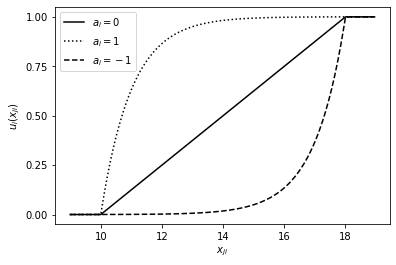

In [2]:
u2_min=10
u2_max=18


def u2(x,a):
    if x>u2_max:
        return 1
    elif x<u2_min: 
        return 0
    elif a == 0:
        return (1/(u2_max-u2_min))*(x-u2_min)
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(u2_min))/(b(u2_max)-b(u2_min))
    
def us2(x_list, a): #utility function for the list of values           
    return [u2(x, a) for x in x_list]

def b(x):
    return 1-math.e**(-a*x)

a=1

X = np.arange(u2_min-1,u2_max+1,0.05)
Y1 = [u2(x,a) for x in X]
Y2 = [u2(x,-a) for x in X]
Y3 = [u2(x,0) for x in X] 
plt.plot(X,Y3, label=r'$a_i=0$', color='black') 
plt.plot(X,Y1, label=r'$a_i=$' + str(a), color='black', linestyle='dotted') 
plt.plot(X,Y2, label=r'$a_i=-$' + str(a), color='black', linestyle='dashed') 
plt.xlabel(r"$x_{ji}$")
plt.ylabel(r"$u_i(x_{ji})$")

import matplotlib.ticker as plticker


plt.yticks(np.arange(0, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.grid(False)
#plt.savefig('u2.eps', format='eps')

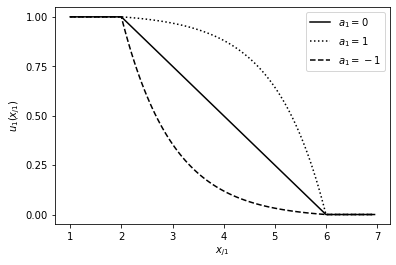

In [3]:
u1_min=2
u1_max=6

def u1(x, a):
    if x>u1_max:
        return 0
    elif x<u1_min: 
        return 1
    elif a == 0:
        return -(1/(u1_max-u1_min))*(x-u1_max)
    else: 
        def b(x):
            return 1-math.e**(a*x)
        return (b(x)-b(u1_max))/(b(u1_min)-b(u1_max))
    
    
    
def us1(x_list, a): #utility function for the list of values           
    return [u1(x, a) for x in x_list]

a=1

X = np.arange(u1_min-1,u1_max+1,0.05)
Y1 = [u1(x,a) for x in X]
Y2 = [u1(x,-a) for x in X]
Y3 = [u1(x,0) for x in X] 
plt.plot(X,Y3, label=r'$a_1=0$', color='black') 
plt.plot(X,Y1, label=r'$a_1=$' + str(a), color='black', linestyle='dotted') 
plt.plot(X,Y2, label=r'$a_1=-$' + str(a), color='black', linestyle='dashed') 
plt.xlabel(r"$x_{j1}$")
plt.ylabel(r"$u_1(x_{j1})$")

import matplotlib.ticker as plticker


plt.yticks(np.arange(0, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.grid(False)
#plt.savefig('u1.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


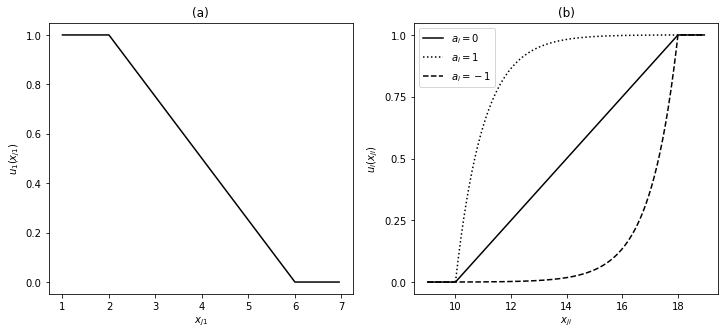

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))


X = np.arange(u1_min-1,u1_max+1,0.05)
Y1 = [u1(x,a) for x in X]
Y2 = [u1(x,-a) for x in X]
Y3 = [u1(x,0) for x in X] 
ax1.plot(X,Y3, label=r'$a_1=0$', color='black') 
#ax1.plot(X,Y1, label=r'$a_1=$' + str(a), color='black', linestyle='dotted') 
#ax1.plot(X,Y2, label=r'$a_1=-$' + str(a), color='black', linestyle='dashed') 
ax1.set_xlabel(r"$x_{j1}$")
ax1.set_ylabel(r"$u_1(x_{j1})$")
ax1.set_title("(a)")
#ax1.legend()

X = np.arange(u2_min-1,u2_max+1,0.05)
Y1 = [u2(x,a) for x in X]
Y2 = [u2(x,-a) for x in X]
Y3 = [u2(x,0) for x in X] 
ax2.plot(X,Y3, label=r'$a_i=0$', color='black') 
ax2.plot(X,Y1, label=r'$a_i=$' + str(a), color='black', linestyle='dotted') 
ax2.plot(X,Y2, label=r'$a_i=-$' + str(a), color='black', linestyle='dashed') 
ax2.set_xlabel(r"$x_{ji}$")
ax2.set_ylabel(r"$u_i(x_{ji})$")
ax2.legend()
ax2.set_title("(b)")
ax2.set_yticks(np.arange(0, 1.25, 0.25))
ax2.set_yticklabels(np.arange(0, 1.25, 0.25))


plt.grid(which='major', axis='both', linestyle='-')
plt.grid(False)
plt.savefig('u2.eps', format='eps')

### Import Multiattribute data from Hatush and Skitmore (1997). 

In [6]:
d = [[4.7, 4.4, 4.3, 4.8, 4.2]
,[14.5, 14.5, 14.5, 10, 12]
,[11, 12, 12, 15.5, 8.5]
,[13, 13.5, 13.5, 12, 12.5]
,[10, 13, 13, 8.5, 16]
,[12, 14, 14, 10, 10]]



In [7]:
a_d = pd.DataFrame(d, columns=["A", "B", "C","D","E"], index=["bid", "fin", "tec", "mng", "has", "rep"])

In [8]:
a_d2 = a_d.T
a_d2

,bid,fin,tec,mng,has,rep
A,4.7,14.5,11.0,13.0,10.0,12.0
B,4.4,14.5,12.0,13.5,13.0,14.0
C,4.3,14.5,12.0,13.5,13.0,14.0
D,4.8,10.0,15.5,12.0,8.5,10.0
E,4.2,12.0,8.5,12.5,16.0,10.0


In [9]:
w = [0.55, 0.15, 0.1, 0.1, 0.05, 0.05]

In [10]:
a_d["A"]

bid     4.7
fin    14.5
tec    11.0
mng    13.0
has    10.0
rep    12.0
Name: A, dtype: float64

In [11]:
var= a_d2.var()

In [12]:
np.sqrt(var*(1-0.5))

bid    0.183030
fin    1.444818
tec    1.778342
mng    0.460977
has    2.067607
rep    1.414214
dtype: float64

### Function to generate multiattribute selection problem

In [13]:
def cal_post_mu(m=5, var_prop =0.5, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0]):
    
    out_d = {} #dictionary that is returned
    
    i_t = [] #list to store index of maximum true multiattribute utility
    
    #list to store index of maximum 
    i_e = [] #estimates
    i_pr = [] #posterior right way
    i_pw = [] #posterior wrong way
    
    #list to store PDS for 
    d_e = [] #estimates
    d_pr = [] #posterior right way
    d_pw = [] #posterior wrong way
    
    eu_1 = [] 
    eu_2 = []
    eu_3 = []
    
    x_all= []
    xpji_all = []
    eu_all = []
    eu_pr_all = []
    eu_pw_all = []
    xjpr_all = []
    xjpw_all = []
    
    var= a_d2.var()
    s=np.sqrt(var*var_prop)
    t=np.sqrt(var*(1-var_prop))
    
    def cal_u(multiatt):
        
        u_1 = u1(multiatt[0], a[0])
        u_rest = [u2(multiatt[i], a[i]) for i in list(range(1, len(multiatt)))]
        ul = [u_1] + u_rest
        return np.dot(w, ul)
    
    for k in range(1000):
        x = []
        eu = []
        eu_pr = []
        eu_pw = []
        
        x_p_ji_l = []
        x_jp_r_l = []
        x_jp_w_l = []
        

        for alt in ["A", "B", "C", "D", "E"]: #loop for generating m number of mu alternatives
            
            mu = list(a_d2.mean())
            n = len(mu) #number of attributes
            
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the m.a.utility of one mu alternative u(x_j) 
            
            y_j = a_d[alt]
            #y_j = [np.random.normal(a_d[alt][i], t[i], 1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the m.a.utility of one mu estimates u(y_j)
            
            x_jp_r = [] #one alternative, right way
            x_jp_w = [] #one alternative, wrong way
            
            for i in range(n): #loop for generating posterior mu for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                p_var = (s[i]**2*t[i]**2)/(s[i]**2 + t[i]**2)
                
                x_p_ji = list(np.random.normal(p_mean, np.sqrt(p_var),1000))
                x_p_ji_l.append(x_p_ji)
                
                #right way
                if i==0:
                    x_jp_r.append(np.mean(us1(x_p_ji, a[i])))
                else:
                    x_jp_r.append(np.mean(us2(x_p_ji, a[i])))
                
                #wrong way
                x_jp_w.append(np.mean(x_p_ji))
                
            x_jp_r_l.append(x_jp_r)
            x_jp_w_l.append(x_jp_w)
                
            #right way
            eu_pr.append(np.dot(w, x_jp_r)) #append w_i*E[u(x)|y]
                
            #wrong way
            eu_pw.append(cal_u(x_jp_w)) #append u(x) of one posterior alternative (repeated 1000 times)            
            
        #index of true max
        max_ix = x.index(max(x))
        i_t.append(max_ix)
              
        ###Saving result from estimates
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)
        i_e.append(max_j)

        #disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_e.append(d)
        
        ###Saving result from posterior right way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu1 = max(eu_pr)
        max_j1 = eu_pr.index(max_eu1)
        i_pr.append(max_j1)
        
        #disappointment 
        d2 = (x[max_j1]-max_eu1)/max_eu1
        d_pr.append(d2)
        
        #optimality gap E[u(X_{\kappa(u(Y))}-u(X_{\kappa(Z}] 
        eu_1.append(x[max_j]-x[max_j1])
        

        ###Saving result from posterior wrong way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu2 = max(eu_pw)
        max_j2 = eu_pw.index(max_eu2)
        i_pw.append(max_j2)

        #disappointment 
        d3 = (x[max_j2]-max_eu2)/max_eu2
        d_pw.append(d3)    
        
        #optimality gap E[u(X_{\kappa(u(Y))}-u(Z_{\kappa(\tilde{Z})}] 
        eu_2.append(x[max_j]-x[max_j2])
        
        #optimality gap E[u(X_{\kappa(\tilde{Z})}) - u(X_{\kappa(Z))]
        eu_3.append(x[max_j2]- x[max_j1])
        
        xpji_all.append(x_p_ji_l)
        x_all.append(x)
        eu_all.append(eu)
        eu_pr_all.append(eu_pr)        
        eu_pw_all.append(eu_pw)
        
        xjpr_all.append(x_jp_r_l)
        xjpw_all.append(x_jp_w_l)
    
    out_d["x"] = x_all
    out_d["xpji"] = xpji_all
    out_d["eu"] = eu_all
    out_d["eu_pw"] = eu_pw_all
    out_d["eu_pr"] = eu_pr_all  
    
    out_d["xjprl"] = xjpr_all
    out_d["xjpwl"] = xjpw_all
    
    out_d["i_t"] = i_t
    out_d["i_e"] = i_e
    out_d["i_pr"] = i_pr
    out_d["i_pw"] = i_pw
    
    out_d["d_e"] = d_e
    out_d["d_pr"] = d_pr
    out_d["d_pw"] = d_pw
    
    out_d["eu_1"] = eu_1
    out_d["eu_2"] = eu_2
    out_d["eu_3"] = eu_3
    
    return out_d

In [23]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_78016/2408035591.py:2: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


### Generate problem instances with varying uncertanity ratio

In [59]:
dd = cal_post_mu(var_prop = 0.5 , w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,1,1,-1,-1,-1])
dd2 = cal_post_mu(var_prop = 0.2 , w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,1,1,-1,-1,-1])
dd3 = cal_post_mu(var_prop = 0.8 , w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,1,1,-1,-1,-1])


### Final outcomes

In [60]:
def draw_plots(dd, filename): 
    x = np.array(dd["d_e"])

    ax = sns.kdeplot(x, label=r"$u(\boldsymbol{y}^*)$", color='grey')
    kdeline = ax.lines[0]
    mean = x.mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height, color='grey')
    #ax.fill_between(xs, 0, ys, facecolor='black', alpha=0.2)


    x = np.array(dd["d_pw"])

    ax = sns.kdeplot(x, label=r"$\boldsymbol{\tilde{z}}$", color='black', linestyle='--')
    kdeline = ax.lines[0]
    mean = x.mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height, color='black', ls='--')
    #ax.fill_between(xs, 0, ys, facecolor='black', alpha=0.2)

    x = np.array(dd["d_pr"])

    ax = sns.kdeplot(x, label=r"$\boldsymbol{z}$", color='black')
    kdeline = ax.lines[0]
    mean = x.mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height, color='black')
    #ax.fill_between(xs, 0, ys, facecolor='black', alpha=0.2)

    plt.legend()
    plt.savefig(filename, format='eps')

    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


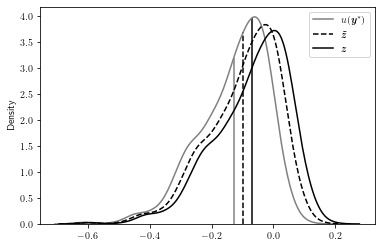

In [61]:
draw_plots(dd, 'prop_55.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


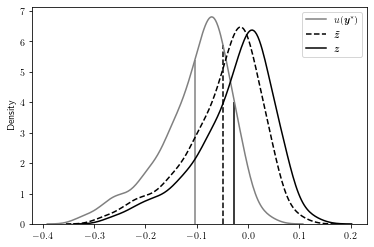

In [63]:
draw_plots(dd2, 'prop_28.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


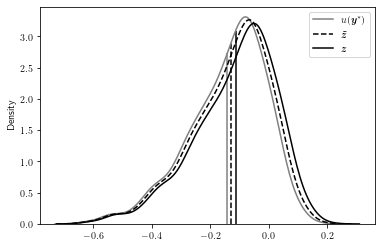

In [64]:
draw_plots(dd3, 'prop_82.eps')

### Old version of final outcome

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


            0      1      2      3      4
y       0.391  0.457  0.471  0.265  0.384
z       0.401  0.436  0.443  0.385  0.395
tlidez  0.416  0.448  0.455  0.402  0.384
uy -0.13358108249241588
z -0.07583032558077045
zt -0.10222033255402417


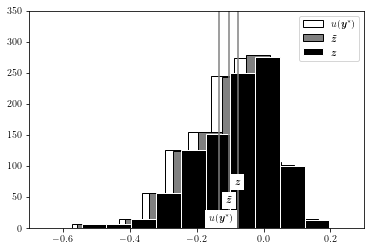

In [24]:
dd = cal_post_mu(var_prop = 0.5 , w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,1,1,-1,-1,-1])

plt.hist(dd["d_e"], label=r"$u(\boldsymbol{y}^*)$", color="white", edgecolor='black')
plt.hist(dd["d_pw"], label=r"$\boldsymbol{\tilde{z}}$", color="gray", edgecolor='black')
plt.hist(dd["d_pr"], label=r"$\boldsymbol{z}$", color="black", edgecolor='white')
plt.ylim(0, 350)
plt.xlim(-0.7, 0.3)

plt.axvline(np.mean(dd["d_e"]), color="gray")
plt.text(np.mean(dd["d_e"])-0.03,10,r"$u(\boldsymbol{y}^*)$", bbox=dict(facecolor='white', edgecolor='none'))
plt.axvline(np.mean(dd["d_pr"]), color="gray")
plt.text(np.mean(dd["d_pr"])-0.01,70,r"$\boldsymbol{z}$", bbox=dict(facecolor='white', edgecolor='none'))
plt.axvline(np.mean(dd["d_pw"]), color="gray")
plt.text(np.mean(dd["d_pw"])-0.01,40,r"$\boldsymbol{\tilde{z}}$", bbox=dict(facecolor='white', edgecolor='none'))


plt.legend()

r_d = {}
r_d["y"] = np.array(dd["eu"])[0]
r_d["z"] = np.array(dd["eu_pr"])[0]
r_d["tlidez"] = np.array(dd["eu_pw"])[0]

plt.savefig('prop_55.eps', format='eps')
print(pd.DataFrame(r_d).T.round(3))
print("uy", np.mean(dd["d_e"]))
print("z", np.mean(dd["d_pr"]))
print("zt", np.mean(dd["d_pw"]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


            0      1      2      3      4
y       0.391  0.457  0.471  0.265  0.384
z       0.418  0.431  0.435  0.422  0.416
tlidez  0.430  0.441  0.444  0.431  0.429
uy -0.10295087797130915
z -0.026147105243129326
zt -0.048487388641765536


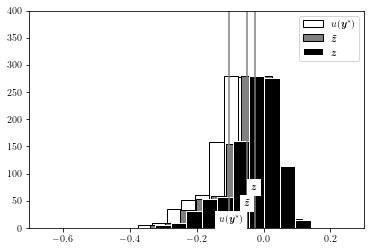

In [25]:
dd = cal_post_mu(var_prop = 0.2 , w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,1,1,-1,-1,-1])

plt.hist(dd["d_e"], label=r"$u(\boldsymbol{y}^*)$", color="white", edgecolor='black')
plt.hist(dd["d_pw"], label=r"$\boldsymbol{\tilde{z}}$", color="gray", edgecolor='black')
plt.hist(dd["d_pr"], label=r"$\boldsymbol{z}$", color="black", edgecolor='white')
plt.ylim(0, 400)
plt.xlim(-0.7, 0.3)


plt.axvline(np.mean(dd["d_e"]), color="gray")
plt.text(np.mean(dd["d_e"])-0.03,10,r"$u(\boldsymbol{y}^*)$", bbox=dict(facecolor='white', edgecolor='none'))
plt.axvline(np.mean(dd["d_pr"]), color="gray")
plt.text(np.mean(dd["d_pr"])-0.01,70,r"$\boldsymbol{z}$", bbox=dict(facecolor='white', edgecolor='none'))
plt.axvline(np.mean(dd["d_pw"]), color="gray")
plt.text(np.mean(dd["d_pw"])-0.01,40,r"$\boldsymbol{\tilde{z}}$", bbox=dict(facecolor='white', edgecolor='none'))


plt.legend()

r_d = {}
r_d["y"] = np.array(dd["eu"])[0]
r_d["z"] = np.array(dd["eu_pr"])[0]
r_d["tlidez"] = np.array(dd["eu_pw"])[0]
plt.savefig('prop_28.eps', format='eps')


print(pd.DataFrame(r_d).T.round(3))

print("uy", np.mean(dd["d_e"]))
print("z", np.mean(dd["d_pr"]))
print("zt", np.mean(dd["d_pw"]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


            0      1      2      3      4
y       0.391  0.457  0.471  0.265  0.384
z       0.391  0.445  0.456  0.336  0.382
tlidez  0.401  0.454  0.464  0.344  0.378
uy -0.14989787067631016
z -0.12251779168591714
zt -0.13788117491968693


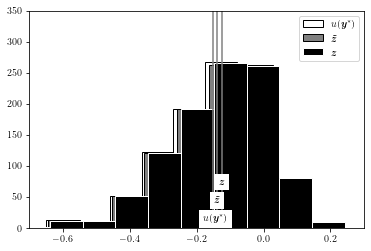

In [26]:
dd = cal_post_mu(var_prop = 0.8 , w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,1,1,-1,-1,-1])

plt.hist(dd["d_e"], label=r"$u(\boldsymbol{y}^*)$", color="white", edgecolor='black')
plt.hist(dd["d_pw"], label=r"$\boldsymbol{\tilde{z}}$", color="gray", edgecolor='black')
plt.hist(dd["d_pr"], label=r"$\boldsymbol{z}$", color="black", edgecolor='white')
plt.ylim(0, 350)
plt.xlim(-0.7, 0.3)


plt.axvline(np.mean(dd["d_e"]), color="gray")
plt.text(np.mean(dd["d_e"])-0.03, 10,r"$u(\boldsymbol{y}^*)$", bbox=dict(facecolor='white', edgecolor='none'))
plt.axvline(np.mean(dd["d_pr"]), color="gray")
plt.text(np.mean(dd["d_pr"])-0.01, 70,r"$\boldsymbol{z}$", bbox=dict(facecolor='white', edgecolor='none'))
plt.axvline(np.mean(dd["d_pw"]), color="gray")
plt.text(np.mean(dd["d_pw"])-0.01, 40,r"$\boldsymbol{\tilde{z}}$", bbox=dict(facecolor='white', edgecolor='none'))


plt.legend()

r_d = {}
r_d["y"] = np.array(dd["eu"])[0]
r_d["z"] = np.array(dd["eu_pr"])[0]
r_d["tlidez"] = np.array(dd["eu_pw"])[0]
plt.savefig('prop_82.eps', format='eps')


print(pd.DataFrame(r_d).T.round(3))
print("uy", np.mean(dd["d_e"]))
print("z", np.mean(dd["d_pr"]))
print("zt", np.mean(dd["d_pw"]))